<a href="https://colab.research.google.com/github/AnnaVirasova2004/ML-BIN-22-2/blob/main/ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подбор признаков и валидация моделей

1. Загрузка библиотек и предобработка данных

In [ ]:
!pip install pandas scikit-learn seaborn scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

In [ ]:
# Загрузка набора данных
df = pd.read_csv('/content/BostonHousing.csv')
df
# crim - преступность на душу населения;
# zn - % жилых земель с участками > 25.000 кв. футов;
# indus - % нежилых бизнес-акров;
# chas - прилегание к реке Чарльз (1 - да, 0 - нет);
# nox - концентрация окислов азота;
# rm - среднее число комнат на 1 жильё;
# age - % домов, занятых владельцема, построенных до 1940 г;
# dis - расстояние до центров занятости;
# rad - доступность к шоссе;
# tax - налог на недвижимость;
# ptratio - соотношение учеников и учителей;
# b - индекс доли чернокожего населения;
# lstat - % людей с низким статусом;
# medv - медианная цена жилья (%1000)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
# high_crime_rate - высокий уровень преступности (взят из crim), если >= 0.8,
# то уровень преступности высок
df['high_crime_rate'] = np.where(df['crim'] >= 0.8, 1, 0)
df.high_crime_rate = df.high_crime_rate.astype('category')

In [ ]:
Y = df['high_crime_rate'] # Целевая переменная (категориальная)
X = df.drop('high_crime_rate', axis=1) # Переменные для проверки влияния

X = X.drop('crim', axis=1)

In [ ]:
df.drop('crim', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   zn               506 non-null    float64 
 1   indus            506 non-null    float64 
 2   chas             506 non-null    int64   
 3   nox              506 non-null    float64 
 4   rm               506 non-null    float64 
 5   age              506 non-null    float64 
 6   dis              506 non-null    float64 
 7   rad              506 non-null    int64   
 8   tax              506 non-null    int64   
 9   ptratio          506 non-null    float64 
 10  b                506 non-null    float64 
 11  lstat            506 non-null    float64 
 12  medv             506 non-null    float64 
 13  high_crime_rate  506 non-null    category
dtypes: category(1), float64(10), int64(3)
memory usage: 52.1 KB


In [ ]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,high_crime_rate
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


2. Масштабирование признаков

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zn       506 non-null    float64
 1   indus    506 non-null    float64
 2   chas     506 non-null    int64  
 3   nox      506 non-null    float64
 4   rm       506 non-null    float64
 5   age      506 non-null    float64
 6   dis      506 non-null    float64
 7   rad      506 non-null    int64  
 8   tax      506 non-null    int64  
 9   ptratio  506 non-null    float64
 10  b        506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [ ]:
# Создала копию данных (чтобы не изменить оригинальные)
X_processed = X.copy()

# Колонки (тип "category")
category_columns: list[str] = X_processed.select_dtypes(include=['category']).columns

# Применяем One-Hot Encoding
# drop_first = True -> Исключила 1 категорию  (убрала избыточность)
X_processed = pd.get_dummies(X_processed, columns=category_columns, drop_first=True)

# Вывод нового DataFrame
X_processed

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
# Список числовых признаков (столбцы, тип "float64")
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

# Инициализируем scaler (масштабирование данных в диапазон [0, 1])
scaler = MinMaxScaler()

# Применяем нормализацию
# fit_transform - Max и  Min значения для каждого признака, преобразование по формуле
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

# Вывод обработанного DataFrame
X_processed

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.18,0.067815,0,0.314815,0.577505,0.641607,0.269203,1,296,0.287234,1.000000,0.089680,0.422222
1,0.00,0.242302,0,0.172840,0.547998,0.782698,0.348962,2,242,0.553191,1.000000,0.204470,0.368889
2,0.00,0.242302,0,0.172840,0.694386,0.599382,0.348962,2,242,0.553191,0.989737,0.063466,0.660000
3,0.00,0.063050,0,0.150206,0.658555,0.441813,0.448545,3,222,0.648936,0.994276,0.033389,0.631111
4,0.00,0.063050,0,0.150206,0.687105,0.528321,0.448545,3,222,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.00,0.420455,0,0.386831,0.580954,0.681771,0.122671,1,273,0.893617,0.987619,0.219095,0.386667
502,0.00,0.420455,0,0.386831,0.490324,0.760041,0.105293,1,273,0.893617,1.000000,0.202815,0.346667
503,0.00,0.420455,0,0.386831,0.654340,0.907312,0.094381,1,273,0.893617,1.000000,0.107892,0.420000
504,0.00,0.420455,0,0.386831,0.619467,0.889804,0.114514,1,273,0.893617,0.991301,0.131071,0.377778


3. Очистка данных и удаление выбросов

Функция обучения с оценкой качества

Обучающая выборка -> используется для обучении модели;

Тестовая выборка -> используется для оценки качества модели

In [ ]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    # stratify=Y сохраняет пропорции классов в обучающей и тестовой выборках

    # X_train и Y_train → обучающая выборка
    # X_test и Y_test → тестовая выборка
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    # max_iter = 1000 максимальное кол-во итераций для обеспечения сходимости
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    # Вычисление точности (accuracy) на тестовой выборке
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    # Вычисление точности (accuracy) на тестовой выборке
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

# Вызов функции
train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9381
Точность на тестовой выборке: 0.9412

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        65
           1       0.97      0.86      0.91        37

    accuracy                           0.94       102
   macro avg       0.95      0.92      0.93       102
weighted avg       0.94      0.94      0.94       102



LogisticRegression(max_iter=1000)

Метод 1: удаление на основе медианы

In [ ]:
# Функция для удаления выбросов из данных на основе межквартильного размаха (1.5 IQR)
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    # Работать только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем первый и третий квартили для каждой числовой переменной
    Q1 = X_numeric.quantile(0.25) # Нижний квартиль (25%)
    Q3 = X_numeric.quantile(0.75) # Верхний квартиль (75%)

    # Вычисляем межквартильный размах (IQR) как разницу между Q3 и Q1
    IQR = Q3 - Q1

    # Оставляем только те значения, которые находятся в диапазоне [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    # Синхронизируем 'y' (числовую переменную) с отфильтрованными 'X'
    y_filtered = y.loc[X_filtered.index]

    # Возвращаем очищенные данные
    return X_filtered, y_filtered

# Применить функцию удаления выбросов к обработанному датасету
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3)

X_processed.describe()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,9.549407,408.237154,0.622929,0.898568,0.301409,0.389618
std,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,8.707259,168.537116,0.230313,0.230205,0.197049,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,187.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,4.000000,279.000000,0.510638,0.945730,0.144040,0.267222
50%,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,5.000000,330.000000,0.686170,0.986232,0.265728,0.360000
75%,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,24.000000,666.000000,0.808511,0.998298,0.420116,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,711.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_iqr.describe()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,361.000000,361.000000,361.0,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.057271,0.386298,0.0,0.339606,0.512092,0.678850,0.235174,8.795014,393.537396,0.642424,0.974102,0.301831,0.374669
std,0.114754,0.244722,0.0,0.214755,0.119608,0.280758,0.168406,8.186172,163.187092,0.213095,0.041023,0.186025,0.167761
min,0.000000,0.028959,0.0,0.049383,0.110558,0.000000,0.000673,1.000000,188.000000,0.042553,0.792577,0.020419,0.000000
25%,0.000000,0.189883,0.0,0.150206,0.443188,0.456231,0.097100,4.000000,277.000000,0.553191,0.970044,0.160044,0.282222
50%,0.000000,0.296921,0.0,0.302469,0.499329,0.737384,0.200247,5.000000,311.000000,0.691489,0.990922,0.266280,0.355556
75%,0.000000,0.646628,0.0,0.471193,0.565242,0.937178,0.348962,8.000000,437.000000,0.808511,1.000000,0.402042,0.431111
max,0.450000,1.000000,0.0,1.000000,0.926806,1.000000,0.735962,24.000000,711.000000,0.914894,1.000000,1.000000,0.973333


In [ ]:
train_and_evaluate(X_iqr, y_iqr)

Точность на обучающей выборке: 0.9514
Точность на тестовой выборке: 0.9315

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        52
           1       1.00      0.76      0.86        21

    accuracy                           0.93        73
   macro avg       0.96      0.88      0.91        73
weighted avg       0.94      0.93      0.93        73



LogisticRegression(max_iter=1000)

⏰ Анализ:

Уменьшилось количество данных (support) 102 -> 73;

Полнота: Recall (1) уменьшилась 0.86 -> 0.76 (хуже замечает элементы = 1, а значит, что recall (0) логически вырос) 0.98 -> 1 (это свидетельствует о росте ошибок в анализе данных)

Точность: Precision (1) наоборот увеличилась 0.97 -> 1 (нет ошибок касательно 1), precision (0) же уменьшился 0.93 -> 0.91

В обоих моделях (X_processed, Y) и (X_iqr, y_iqr) для (1) precision низкий, а recall высокий (значит, что модель ищет все элементы класса 1, но часто это неверно), в случае (0) precision высокий, а recall низкий (значит, что цель на минимум ошибок и если для модели элемент класса 1, то это точно 1)

Общая точность Accuracy уменьшилась 0.94 -> 0.93, чтобы не потерять важные данные в анализе, лучше оставить данные без изменений


3: Методы отбора признаков

Filter метод

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
# Применяем SelectKBest для выбора 5 лучших признаков
selector = SelectKBest(score_func=f_regression, k=5)
X_kbest = selector.fit_transform(X_processed, Y)

In [ ]:
# Оценка значимости признаков
selector.scores_

array([7.60092043e+01, 4.84404504e+02, 7.72876892e-01, 6.99213981e+02,
       4.41904021e+01, 2.48913249e+02, 2.49063678e+02, 8.16526559e+02,
       8.39120457e+02, 5.06375875e+01, 1.41278508e+02, 1.99821316e+02,
       9.59510335e+01])

In [ ]:
X_processed.columns

Index(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
X_processed

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.18,0.067815,0,0.314815,0.577505,0.641607,0.269203,1,296,0.287234,1.000000,0.089680,0.422222
1,0.00,0.242302,0,0.172840,0.547998,0.782698,0.348962,2,242,0.553191,1.000000,0.204470,0.368889
2,0.00,0.242302,0,0.172840,0.694386,0.599382,0.348962,2,242,0.553191,0.989737,0.063466,0.660000
3,0.00,0.063050,0,0.150206,0.658555,0.441813,0.448545,3,222,0.648936,0.994276,0.033389,0.631111
4,0.00,0.063050,0,0.150206,0.687105,0.528321,0.448545,3,222,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.00,0.420455,0,0.386831,0.580954,0.681771,0.122671,1,273,0.893617,0.987619,0.219095,0.386667
502,0.00,0.420455,0,0.386831,0.490324,0.760041,0.105293,1,273,0.893617,1.000000,0.202815,0.346667
503,0.00,0.420455,0,0.386831,0.654340,0.907312,0.094381,1,273,0.893617,1.000000,0.107892,0.420000
504,0.00,0.420455,0,0.386831,0.619467,0.889804,0.114514,1,273,0.893617,0.991301,0.131071,0.377778


In [ ]:
# Список индексов (отобранных, как наиболее важные)
selector.get_support(indices=True)

array([1, 3, 6, 7, 8])

In [ ]:
X_processed

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.18,0.067815,0,0.314815,0.577505,0.641607,0.269203,1,296,0.287234,1.000000,0.089680,0.422222
1,0.00,0.242302,0,0.172840,0.547998,0.782698,0.348962,2,242,0.553191,1.000000,0.204470,0.368889
2,0.00,0.242302,0,0.172840,0.694386,0.599382,0.348962,2,242,0.553191,0.989737,0.063466,0.660000
3,0.00,0.063050,0,0.150206,0.658555,0.441813,0.448545,3,222,0.648936,0.994276,0.033389,0.631111
4,0.00,0.063050,0,0.150206,0.687105,0.528321,0.448545,3,222,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.00,0.420455,0,0.386831,0.580954,0.681771,0.122671,1,273,0.893617,0.987619,0.219095,0.386667
502,0.00,0.420455,0,0.386831,0.490324,0.760041,0.105293,1,273,0.893617,1.000000,0.202815,0.346667
503,0.00,0.420455,0,0.386831,0.654340,0.907312,0.094381,1,273,0.893617,1.000000,0.107892,0.420000
504,0.00,0.420455,0,0.386831,0.619467,0.889804,0.114514,1,273,0.893617,0.991301,0.131071,0.377778


In [ ]:
# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['indus', 'nox', 'dis', 'rad', 'tax'], dtype='object')


In [ ]:
# Преобразуем X_kbest в DataFrame
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

# Обучаем и оцениваем модель
train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.9208
Точность на тестовой выборке: 0.9314

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        65
           1       0.97      0.84      0.90        37

    accuracy                           0.93       102
   macro avg       0.94      0.91      0.92       102
weighted avg       0.93      0.93      0.93       102



LogisticRegression(max_iter=1000)

Wrapper метод

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
base_model = LogisticRegression(max_iter=1000)

# Инициализируем RFE для выбора 5 лучших признаков
rfe = RFE(estimator=base_model, n_features_to_select=5)
rfe.fit(X_processed, Y)

# Получаем список отобранных признаков
selected_features = X_processed.columns[rfe.support_]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['indus', 'nox', 'age', 'ptratio', 'b'], dtype='object')


In [ ]:
# Отбираем признаки
X_rfe = X_processed[selected_features]

# Обучаем и оцениваем модель
model = train_and_evaluate(X_rfe, Y)

Точность на обучающей выборке: 0.8911
Точность на тестовой выборке: 0.9216

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        65
           1       0.89      0.89      0.89        37

    accuracy                           0.92       102
   macro avg       0.92      0.92      0.92       102
weighted avg       0.92      0.92      0.92       102



Embedded метод

Коэффициенты модели без регуляризации: [[-1.00209548e+00  1.39863953e+00  8.42935145e-02  2.74069928e+00
  -6.71338622e-01  2.03710197e+00 -4.79770499e-01  2.88243864e-01
   2.47826352e-04 -5.52191089e-01 -2.21882848e+00  4.36099152e-01
  -2.08315184e-01]]
Коэффициенты модели с регуляризацией: [[-3.80932416e-01  9.18100580e-01  0.00000000e+00  5.69604144e+00
  -2.94950554e-01  2.00074690e+00  0.00000000e+00  2.94673756e-01
  -1.08788916e-03  0.00000000e+00 -6.89859390e+00  0.00000000e+00
   0.00000000e+00]]
Отобранные признаки: Index(['zn', 'indus', 'nox', 'rm', 'age', 'rad', 'tax', 'b'], dtype='object')
Коэффициенты модели после отбора признаков: [[-3.98517365e-01  9.22022517e-01  5.69656540e+00 -3.36784259e-01
   1.98032068e+00  2.94867931e-01 -1.13565761e-03 -6.84051397e+00]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


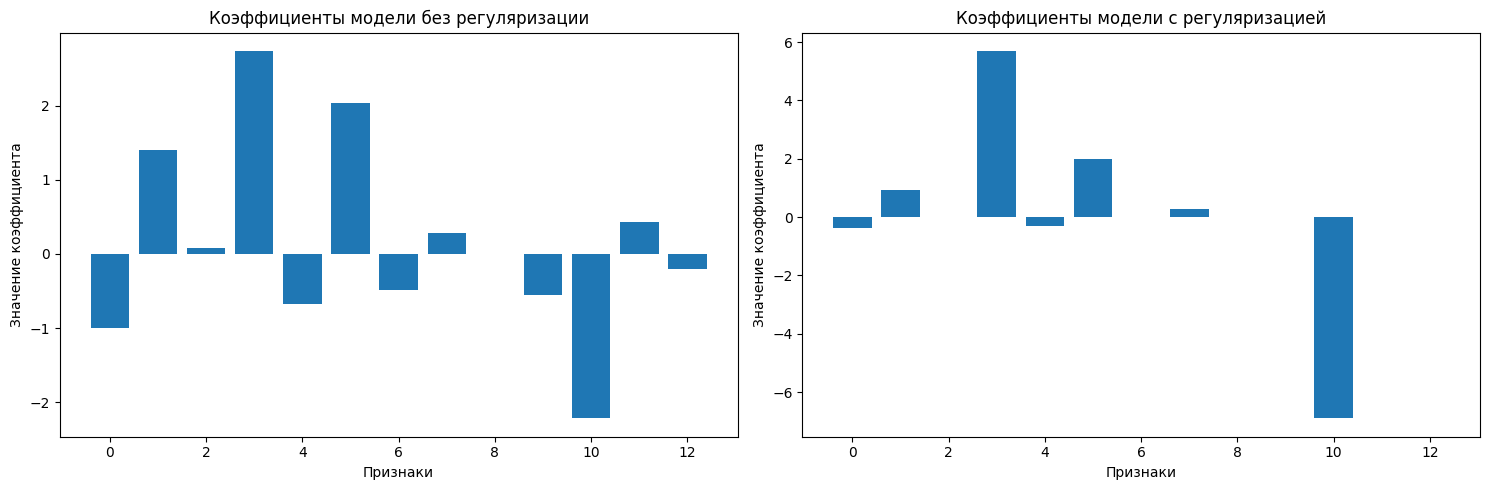

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

# Обучаем модель без регуляризации
model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели без регуляризации
coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

# Инициализируем модель с L1-регуляризацией
model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Обучаем модель с регуляризацией
model_with_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели с регуляризацией
coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:", coefficients_with_penalty)

# Используем SelectFromModel для отбора признаков
selector = SelectFromModel(model_with_penalty, prefit=True)
X_embedded = selector.transform(X_processed)

# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

# Обучаем модель на отобранных признаках
model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

# Выводим коэффициенты модели после отбора признаков
coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:", coefficients_embedded)

# Визуализация коэффициентов моделей
plt.figure(figsize=(15, 5))

# Коэффициенты модели без регуляризации
plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

# Коэффициенты модели с регуляризацией
plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.tight_layout()
plt.show()

In [ ]:
# Преобразуем X_embedded в DataFrame
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

# Обучаем и оцениваем модель
model = train_and_evaluate(X_embedded_df, Y)

Точность на обучающей выборке: 0.9356
Точность на тестовой выборке: 0.9412

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        65
           1       0.97      0.86      0.91        37

    accuracy                           0.94       102
   macro avg       0.95      0.92      0.93       102
weighted avg       0.94      0.94      0.94       102



⏰ Анализ:

В каждой модели метрики различаются:
Самая высокая точность на обучающей выборке у метода Embedded -> 0.9356, самая маленькая же у Wrapper -> 0.8922, точность на обучающей выборке находится в таком же порядке: Embedded -> 0.9412, Wrapper -> 0.9216.

Filter -> precision для класса 1 выше (0.97 > 0.91), а recall наоборот ниже (0.84 < 0.98) - метод реже находит элементы (1)

Wrapper -> стабильная работа для обоих классов (0) precision = 0.94, recall = 0.94, (1) precision = 0.89, recall = 0.89

Embedded -> Самая высокая точность, precision для класса 1 выше (0.97 > 0.93), а recall наоборот ниже (0.86 < 0.98) - метод лучше всего находит элементы (1)

Таким образом лучший метод отбора признаков в моём случае это Embedded

⏰ SequentialFeatureSelector метод

Sequential Feature Selector (SFS) — это метод отбора признаков, который последовательно добавляет или удаляет признаки на основе их влияния на производительность модели. Он может работать в двух режимах:

Forward Selection (прямой отбор): Начинает с пустого набора признаков и добавляет признаки один за другим, выбирая наилучший признак на каждом шаге.
Backward Elimination (обратный отбор):

Начинает с полного набора признаков и удаляет их один за другим, исключая наименее значимые признаки.

Этот метод позволяет улучшить производительность модели, уменьшить переобучение и упростить интерпретацию модели, так как он работает только с наиболее значимыми признаками.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
model = LogisticRegression(max_iter=1000)

# Инициализируем SFS для выбора 5 лучших признаков
sfs = SequentialFeatureSelector(model, n_features_to_select=5)
sfs.fit(X_processed, Y)

# Получение отобранных признаков
selected_features = X_processed.columns[sfs.get_support()]
print(f"Отобранные признаки: {selected_features.tolist()}")

Отобранные признаки: ['zn', 'indus', 'rm', 'dis', 'ptratio']


In [ ]:
# Отбираем признаки
X_sfs = X_processed[selected_features]

# Обучаем и оцениваем модель
model = train_and_evaluate(X_sfs, Y)

Точность на обучающей выборке: 0.9183
Точность на тестовой выборке: 0.9412

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        65
           1       0.92      0.92      0.92        37

    accuracy                           0.94       102
   macro avg       0.94      0.94      0.94       102
weighted avg       0.94      0.94      0.94       102



⏰ Анализ: Сравниваю методы SequentialFeatureSelector и Embedded

У обоих методов одинаковая точноть на тестовой выборке = 0.9412

SequentialFeatureSelector -> precision для класса 1 ниже (0.92 < 0.95) и recall также ниже (0.92 > 0.95) - баланс между точностью и полнотой.

В сравнении с методом Embedded метод SequentialFeatureSelector показал себя лучше, при одинаковой точности тестовой выборке показатели SFS-метода выше, он является более сбалансированным для больших задач
В дальнейшей работе возьму SFS-метод

Логистическая регрессия

In [ ]:
import numpy as np

# Сигмоидная функция
def sigmoid(z):
    # Убедимся, что z это numpy массив
    return 1 / (1 + np.exp(-z))

# Простая реализация логистической регрессии
class OwnLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Метод для обучения модели
    def fit(self, X, y):
        # Инициализация весов
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Градиентный спуск
        for idx_,_ in enumerate(range(self.iterations)):
            # Линейная комбинация
            linear_model = np.dot(X, self.weights) + self.bias
            # Применяем сигмоиду для предсказания
            y_pred = sigmoid(linear_model)

            # Вычисляем градиенты
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            # Обновляем веса и смещение
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # Метод для предсказания
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        print("regression",linear_model)
        y_pred = sigmoid(linear_model)
        print("sigmoid",y_pred)
        # Возвращаем метки классов (0 или 1)
        return [1 if i > 0.5 else 0 for i in y_pred]

5. Кросс-валидация

In [ ]:
# Импорт необходимых библиотек
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score

1. K-fold Cross-Validation

In [ ]:
def k_fold_cross_validation(X, y, n_splits=4):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому фолду
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")


k_fold_cross_validation(X = X_kbest_df.to_numpy(), y = Y.to_numpy())

K-Fold Cross-Validation - Средняя точность: 0.9268841394825647
Точности по каждому фолду: [0.937007874015748, 0.9133858267716536, 0.9365079365079365, 0.9206349206349206]


⏰ Анализ:

Наилучшую среднюю точность при кросс валидации k-fold можно увидеть если n_splits = 4 это 0.927.

Лучшая точность на 1 фолде -> 0.9370, значит, что на данном этапе модель работает лучше всего, второй фолд имеет самую маленькую точность -> 0.9134, 3 фолд немного уступает 1 фолду, а 4 имеет чуть меньшую точность -> 0.9206.

In [ ]:
# ShuffleSplit Cross-Validation
def shuffle_split_cross_validation(X, y, n_splits=5, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

# Пример использования:
shuffle_split_cross_validation(X_processed.to_numpy(), Y.to_numpy())

ShuffleSplit Cross-Validation - Средняя точность: 0.9330049261083744
Точности по каждому разделению: [0.9507389162561576, 0.9310344827586207, 0.9261083743842364, 0.9359605911330049, 0.9211822660098522]


⏰ Анализ:

Для кросс-валидации ShuffleSplit используем результат отсечения выбросов.

Наилучшую среднюю точность при кросс валидации k-fold можно увидеть если n_splits = 5 это 0.933. В принципе неплохие результаты. Возможно отсечение выбросов улучшила модель, но в то же время не исключаем возможность потери важных данных.

In [ ]:
# Train-Test-Validation Split
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Пример использования:
train_test_validation_split(X_processed.to_numpy(), Y.to_numpy())

Точность на валидационных данных: 0.9313725490196079
Точность на тестовых данных: 0.9382716049382716


⏰ Анализ:

Точности почти одинаковы, что говорит о том, что модель хорошо обобщает и не переобучена. Она хорошо справляется с задачей и может эффективно работать с новыми данными.

Лучший вариант для меня это ShuffleSplit Cross-Validation, потому что у него самая высокая точность 0.933, более стабильные результаты.